<a href="https://colab.research.google.com/github/Alphaviper7769/NewRepo/blob/main/TataSteel_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats import zscore

Google drive mounting

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


importing file fro drive

In [ ]:
import shutil

# Define the source file path in Google Drive
source_path = '/content/drive/MyDrive/files_tata_steel/analysis_file.xlsx'

# Define the destination path in Colab's local storage
destination_path = 'file.xlsx'

# Copy the file to Colab's local storage
shutil.copyfile(source_path, destination_path)


'file.xlsx'

# Data Preparation
importing file into pd dataframe -> dataset

In [ ]:
dataset = pd.read_excel('file.xlsx')
num_rows = dataset.shape[0]
num_columns = dataset.shape[1]

print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

dataset.head(5)

Number of rows: 7403
Number of columns: 21


,ID_1,ID_2,INPUT_1,INPUT_2,INPUT_3,INPUT_4,INPUT_5,INPUT_6,INPUT_7,INPUT_8,...,INPUT_10,INPUT_11,INPUT_12,INPUT_13,INPUT_14,INPUT_15,INPUT_16,OUTPUT_1,OUTPUT_2,OUTPUT_3
0,T81587LD,A133,0.0368,0.1231,0.0154,0.0134,0.0066,0.0537,771.0,NaN,...,234.0,211.0,NaN,NaN,NaN,NaN,32.0,0.0374,0.3805,0.0176
1,T81586LD,F109,0.0387,0.6042,0.0072,0.0157,0.0467,0.0769,485.0,50.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0522,0.6064,0.0583
2,T81585LD,A128,0.0328,0.2728,0.0110,0.0163,0.0072,0.0462,889.0,NaN,...,NaN,132.0,NaN,NaN,NaN,NaN,29.0,0.0458,0.4439,0.0149
3,T81584LD,F109,0.0366,0.5642,0.0090,0.0133,0.0411,0.0600,851.0,60.0,...,NaN,NaN,29.0,NaN,NaN,NaN,30.0,0.0460,0.6058,0.0551
4,T81583LD,E110,0.0312,0.4043,0.0092,0.0176,0.0336,0.0485,483.0,NaN,...,NaN,NaN,51.0,NaN,NaN,NaN,35.0,0.0442,0.5214,0.0580


describing the data given

In [ ]:
identification_vars = dataset.columns[:2]
input_vars = dataset.columns[2:18]
output_vars = dataset.columns[18:]

identification_data = dataset[identification_vars]
input_data = dataset[input_vars]
output_data = dataset[output_vars]

In [ ]:
print(input_data.describe())
print(output_data.describe())

           INPUT_1      INPUT_2      INPUT_3      INPUT_4      INPUT_5  \
count  7403.000000  7403.000000  7403.000000  7403.000000  7403.000000   
mean      0.038746     0.309959     0.008678     0.016651     0.027822   
std       0.033573     0.233526     0.002583     0.003892     0.035535   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.030000     0.137000     0.007000     0.014100     0.006600   
50%       0.034400     0.167400     0.008300     0.016300     0.008500   
75%       0.039200     0.480600     0.010000     0.018800     0.041600   
max       0.390000     1.262200     0.035700     0.049400     0.318900   

           INPUT_6       INPUT_7       INPUT_8      INPUT_9     INPUT_10  \
count  7403.000000   6626.000000   1549.000000  3712.000000   983.000000   
mean      0.062670    537.012979     63.505487   175.238955   168.369278   
std       0.020075    377.543943    282.942007   134.961492   158.734612   
min       0.000000      1.000

## NAN

In [ ]:
input_data.isnull().mean()

INPUT_1     0.000000
INPUT_2     0.000000
INPUT_3     0.000000
INPUT_4     0.000000
INPUT_5     0.000000
INPUT_6     0.000000
INPUT_7     0.104957
INPUT_8     0.790761
INPUT_9     0.498582
INPUT_10    0.867216
INPUT_11    0.635958
INPUT_12    0.707821
INPUT_13    0.930704
INPUT_14    0.992841
INPUT_15    0.916115
INPUT_16    0.201810
dtype: float64

In [ ]:
nan_percentage = input_data.isnull().mean()

mask = nan_percentage > 0.85

# Remove columns with high NaN percentage
input_filter = input_data.loc[:, ~mask]

print("Original data shape:", input_data.shape)
print("New data shape:", input_filter.shape)

input_filter.isnull().sum()

Original data shape: (7403, 16)
New data shape: (7403, 12)


INPUT_1        0
INPUT_2        0
INPUT_3        0
INPUT_4        0
INPUT_5        0
INPUT_6        0
INPUT_7      777
INPUT_8     5854
INPUT_9     3691
INPUT_11    4708
INPUT_12    5240
INPUT_16    1494
dtype: int64

Removing the columns which have more than 85% NaN <br> Removing the rows which have more than 5 NaN values

In [ ]:
nan_counts = input_filter.isna().sum(axis=1)

rows=nan_counts[nan_counts >= 5].index
input_filters=input_filter.drop(rows)
output_filters=output_data.drop(rows)
id_filters=identification_data.drop(rows)

input_filters.shape
# id_filters.shape

(6700, 12)

### unique variables
unique data variables after prelimenary cleaning

In [ ]:
print(id_filters.shape)
print(input_filters.shape)
print(output_filters.shape)

(6700, 2)
(6700, 12)
(6700, 3)


In [ ]:
duplicate_rows = id_filters.duplicated(subset=['ID_1', 'ID_2'], keep=False)

if any(duplicate_rows):
    duplicate_indices = id_filters.loc[duplicate_rows].index
    for idx in duplicate_indices:
        input_row = input_filters.loc[idx]
        output_row = output_filters.loc[idx]

        if input_row.equals(output_row):
            print(f"Rows at index {idx} in input_filters and output_filters are the same.")
        else:
            print(f"Rows at index {idx} in input_filters and output_filters are different.")

Rows at index 151 in input_filters and output_filters are different.
Rows at index 152 in input_filters and output_filters are different.
Rows at index 153 in input_filters and output_filters are different.
Rows at index 154 in input_filters and output_filters are different.
Rows at index 155 in input_filters and output_filters are different.
Rows at index 156 in input_filters and output_filters are different.
Rows at index 365 in input_filters and output_filters are different.
Rows at index 366 in input_filters and output_filters are different.
Rows at index 507 in input_filters and output_filters are different.
Rows at index 508 in input_filters and output_filters are different.
Rows at index 561 in input_filters and output_filters are different.
Rows at index 562 in input_filters and output_filters are different.
Rows at index 739 in input_filters and output_filters are different.
Rows at index 740 in input_filters and output_filters are different.
Rows at index 944 in input_filters

there is no duplication as input and output have different values for each row having the same ID_1 and ID_2

In [ ]:
row_counts = id_filters.groupby(['ID_1', 'ID_2']).size().reset_index(name='Count')

# Print the counts only if they are greater than 1
for index, row in row_counts.iterrows():
    id_1 = row['ID_1']
    id_2 = row['ID_2']
    count = row['Count']
    
    if count > 1:
        print(f"For ID_1={id_1} and ID_2={id_2}, the number of rows is {count}.")

For ID_1=T71901LD and ID_2=A139, the number of rows is 3.
For ID_1=T71904LD and ID_2=A111, the number of rows is 2.
For ID_1=T71968LD and ID_2=F109, the number of rows is 2.
For ID_1=T72173LD and ID_2=A137, the number of rows is 2.
For ID_1=T72191LD and ID_2=A103, the number of rows is 2.
For ID_1=T72278LD and ID_2=U807, the number of rows is 2.
For ID_1=T72454LD and ID_2=A122, the number of rows is 2.
For ID_1=T72505LD and ID_2=A103, the number of rows is 4.
For ID_1=T72575LD and ID_2=A122, the number of rows is 2.
For ID_1=T72797LD and ID_2=F106, the number of rows is 2.
For ID_1=T73205LD and ID_2=F106, the number of rows is 2.
For ID_1=T73375LD and ID_2=F216, the number of rows is 2.
For ID_1=T73686LD and ID_2=F106, the number of rows is 2.
For ID_1=T73944LD and ID_2=A103, the number of rows is 2.
For ID_1=T74327LD and ID_2=C141, the number of rows is 2.
For ID_1=T74355LD and ID_2=F219, the number of rows is 2.
For ID_1=T74570LD and ID_2=U802, the number of rows is 2.
For ID_1=T7468

In [ ]:
count_same_values = id_filters.duplicated(keep=False).sum()
count_same_values

123

# EDA

In [ ]:
print(input_filters.describe())
print(output_data.describe())

           INPUT_1      INPUT_2      INPUT_3      INPUT_4      INPUT_5  \
count  6700.000000  6700.000000  6700.000000  6700.000000  6700.000000   
mean      0.038813     0.314907     0.008696     0.016677     0.028468   
std       0.033983     0.234467     0.002588     0.003876     0.035807   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.030000     0.137600     0.007000     0.014100     0.006700   
50%       0.034400     0.170700     0.008300     0.016300     0.008600   
75%       0.039200     0.499250     0.010000     0.018900     0.042500   
max       0.390000     1.262200     0.035700     0.049400     0.318900   

           INPUT_6       INPUT_7       INPUT_8      INPUT_9     INPUT_11  \
count  6700.000000   6478.000000   1523.000000  3699.000000  2691.000000   
mean      0.062304    535.566842     63.624425   175.280076   173.351914   
std       0.019675    365.790692    285.344034   135.031232   171.756041   
min       0.000000      1.000

### UNIVARIATE ANALYSIS

<Figure size 1200x800 with 0 Axes>

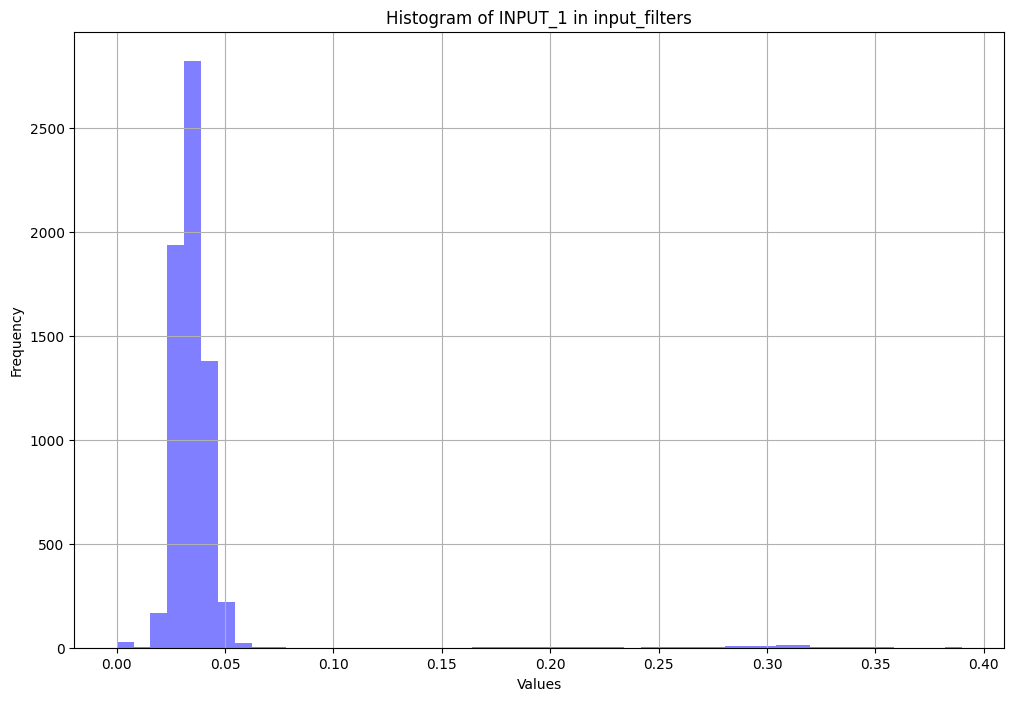

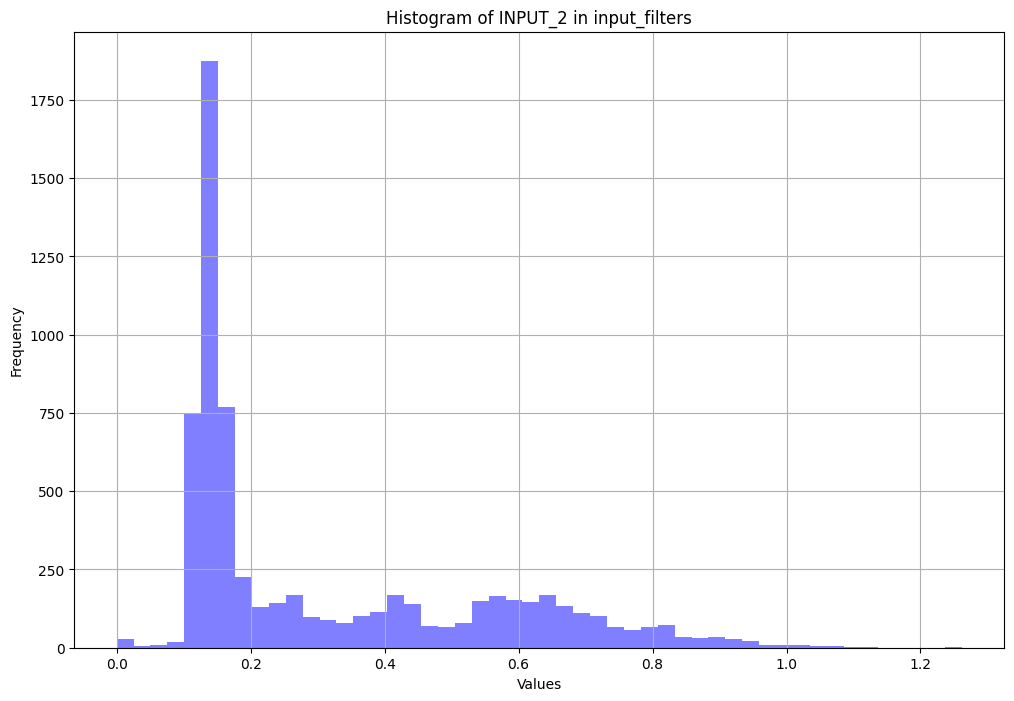

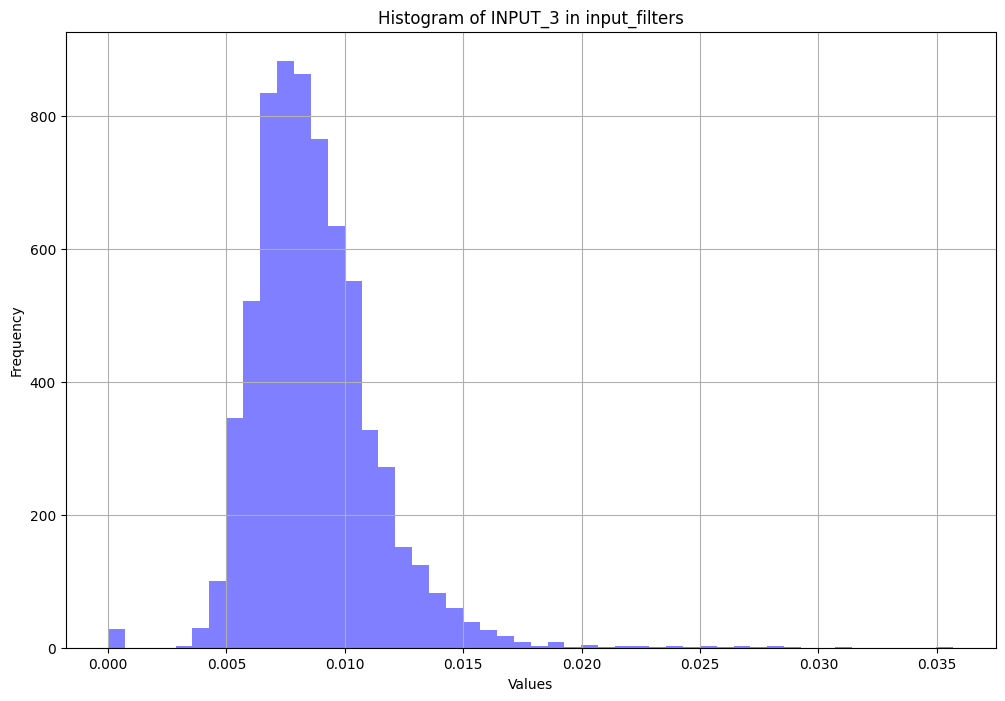

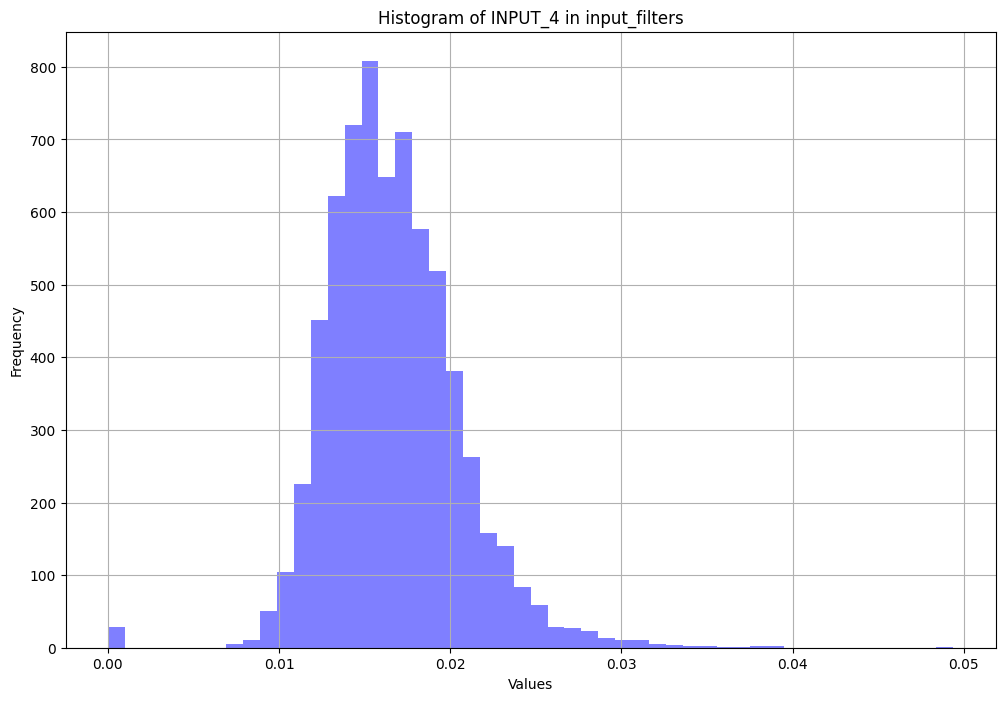

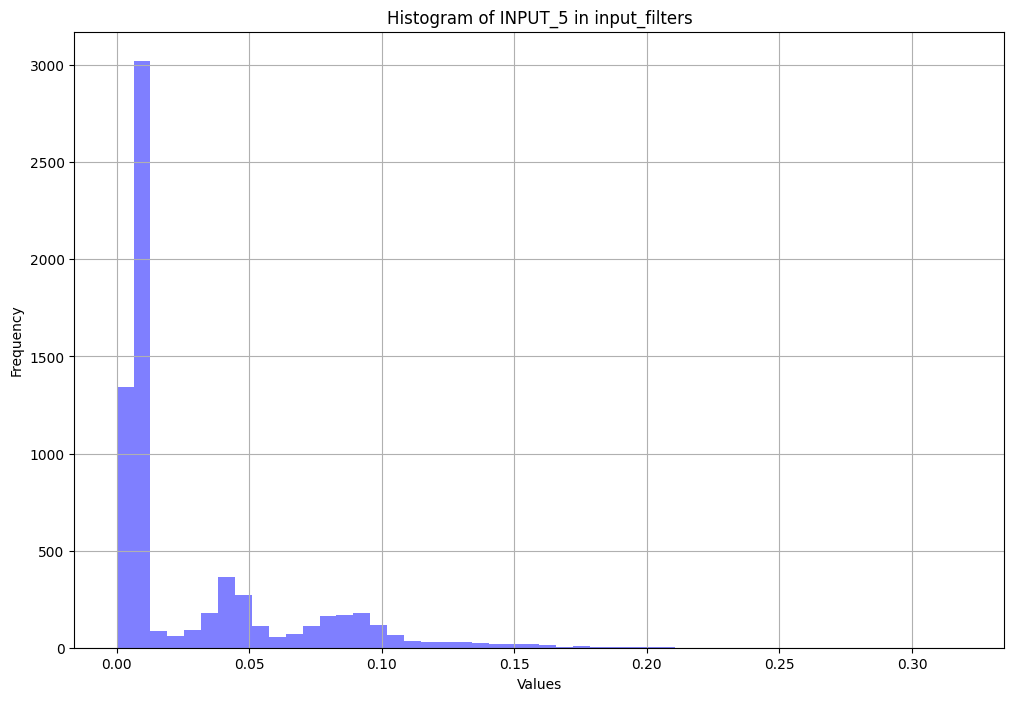

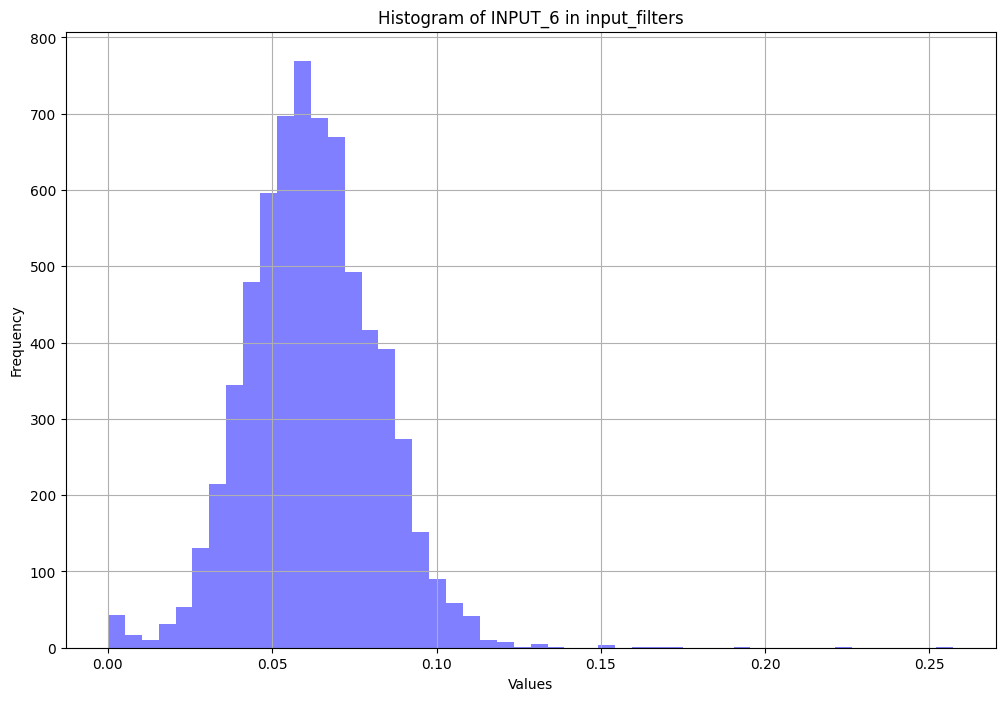

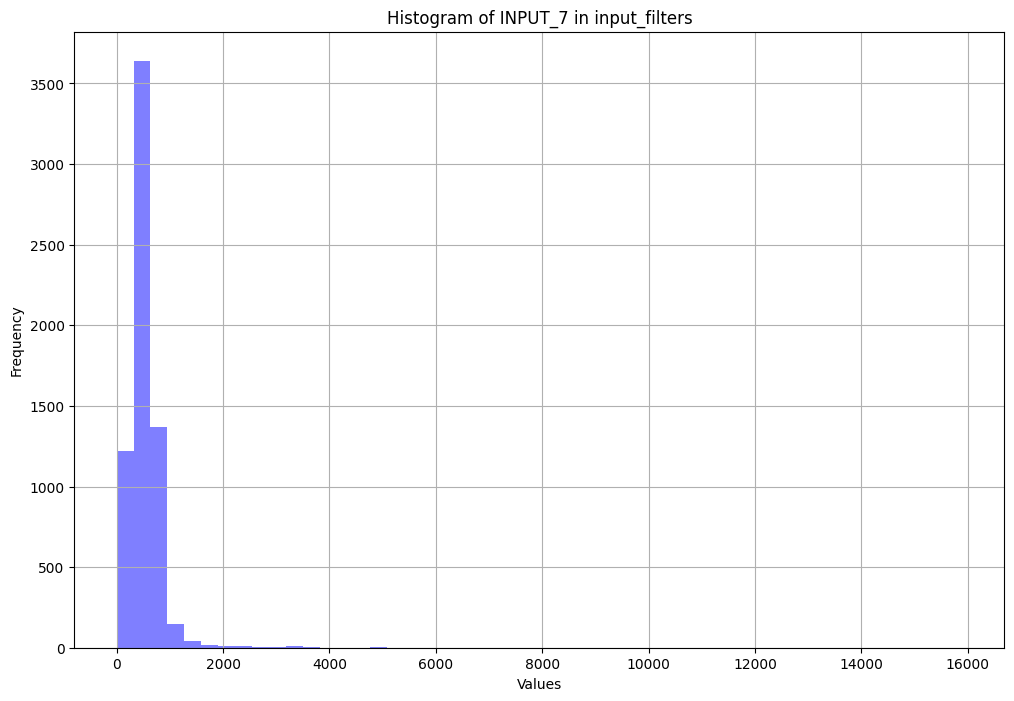

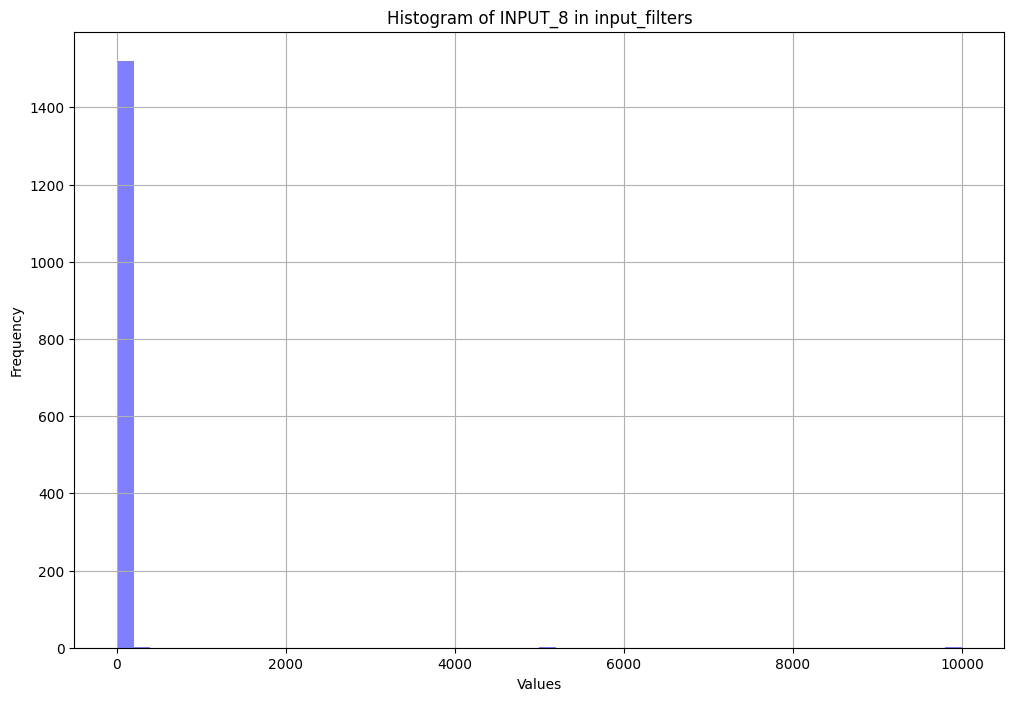

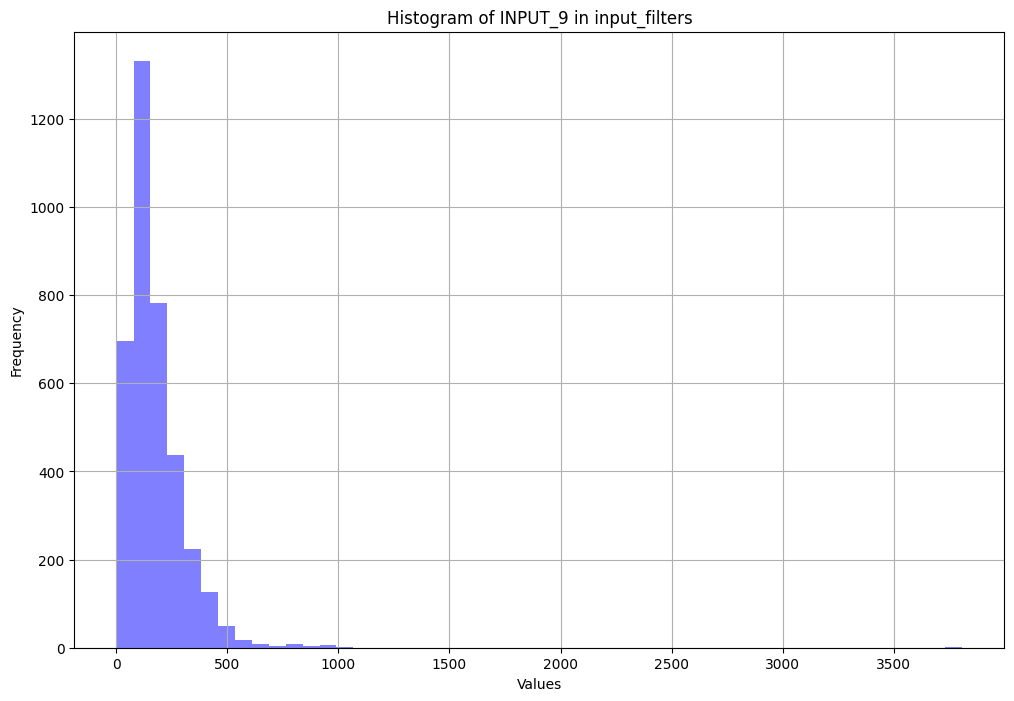

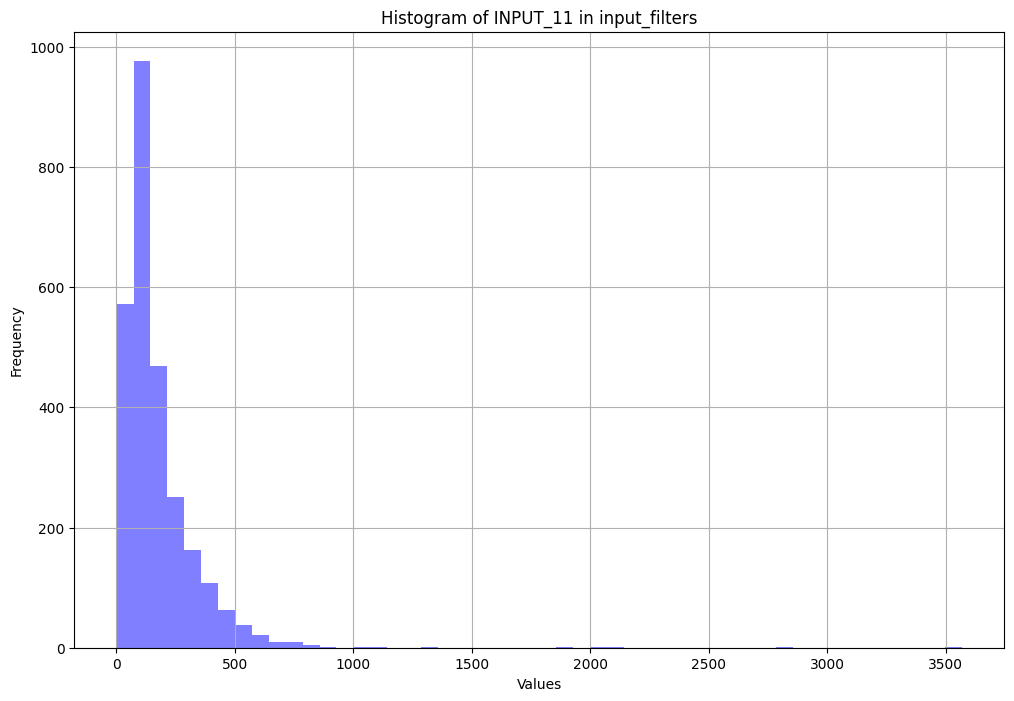

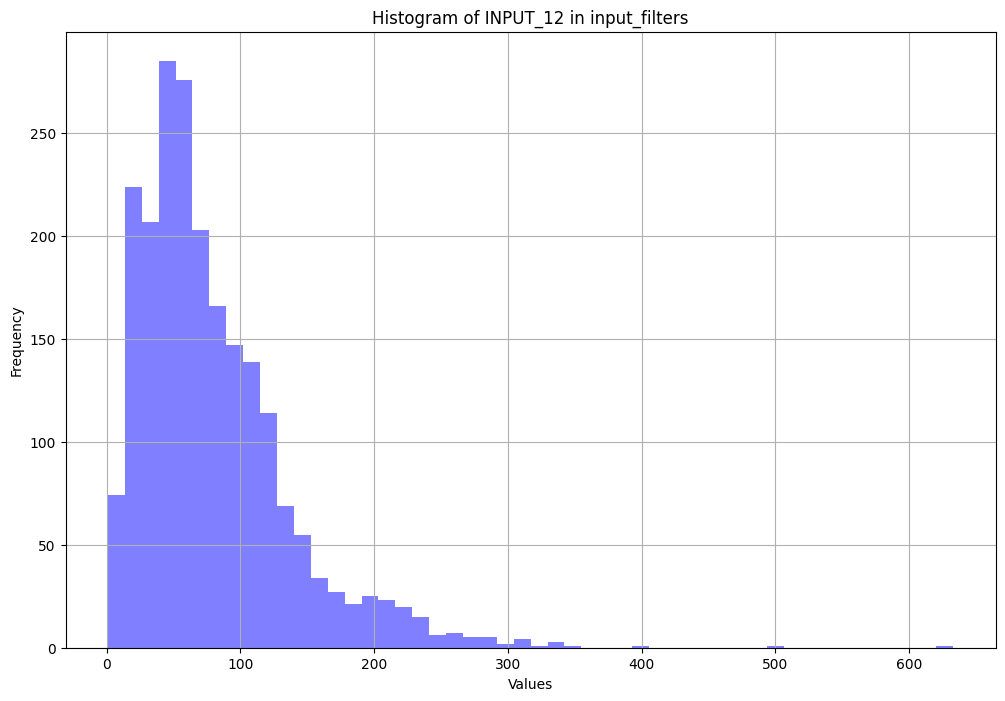

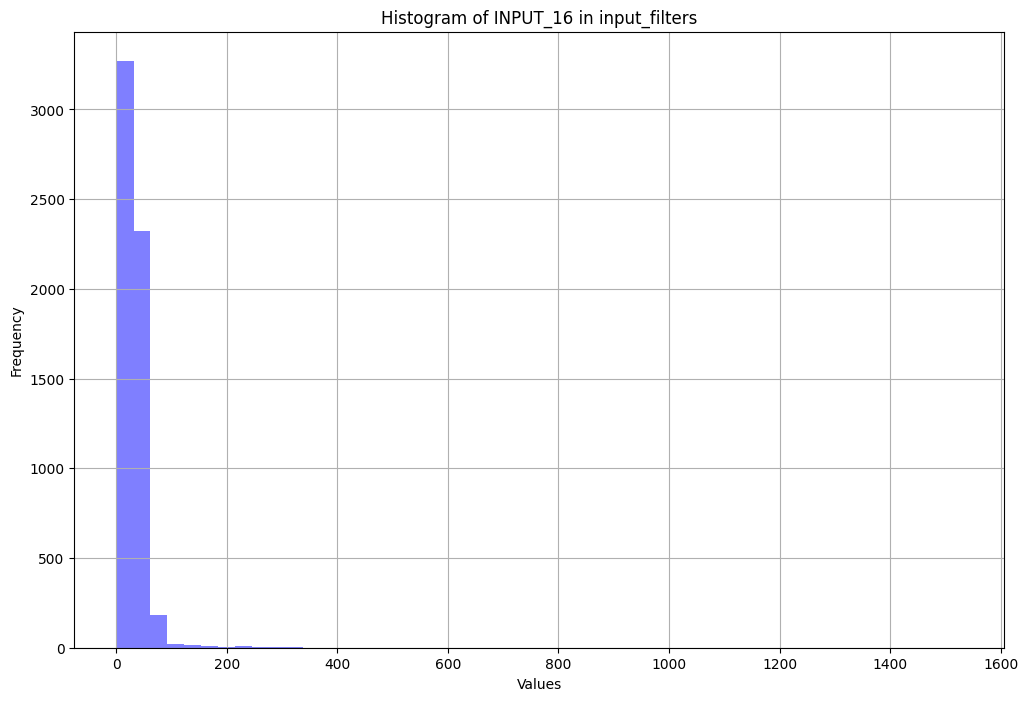

<Figure size 1200x800 with 0 Axes>

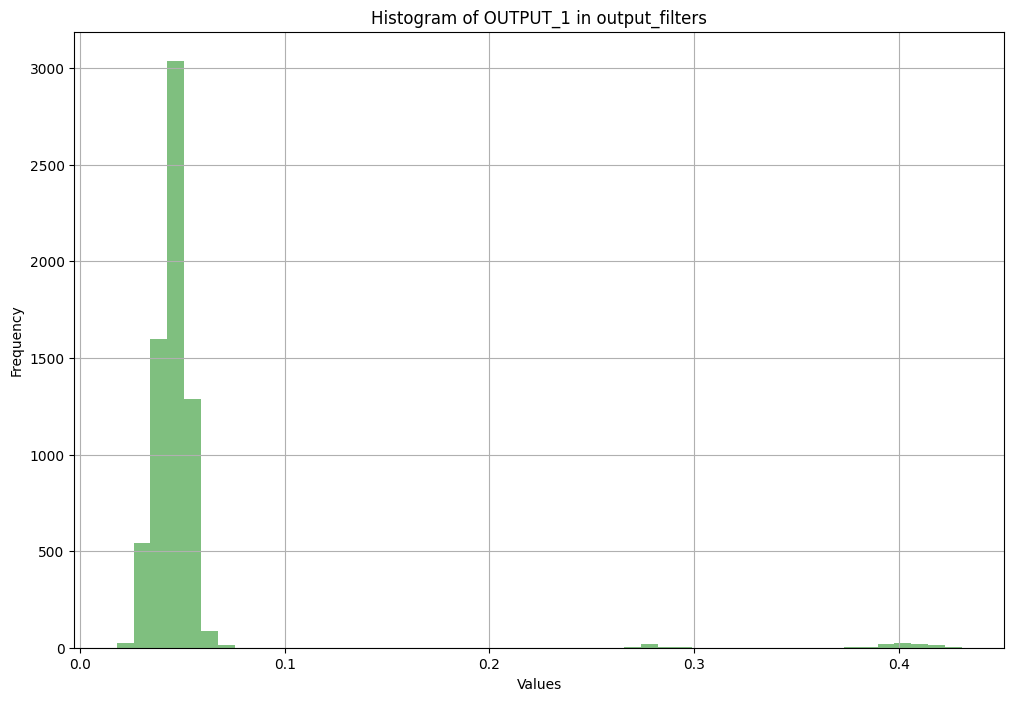

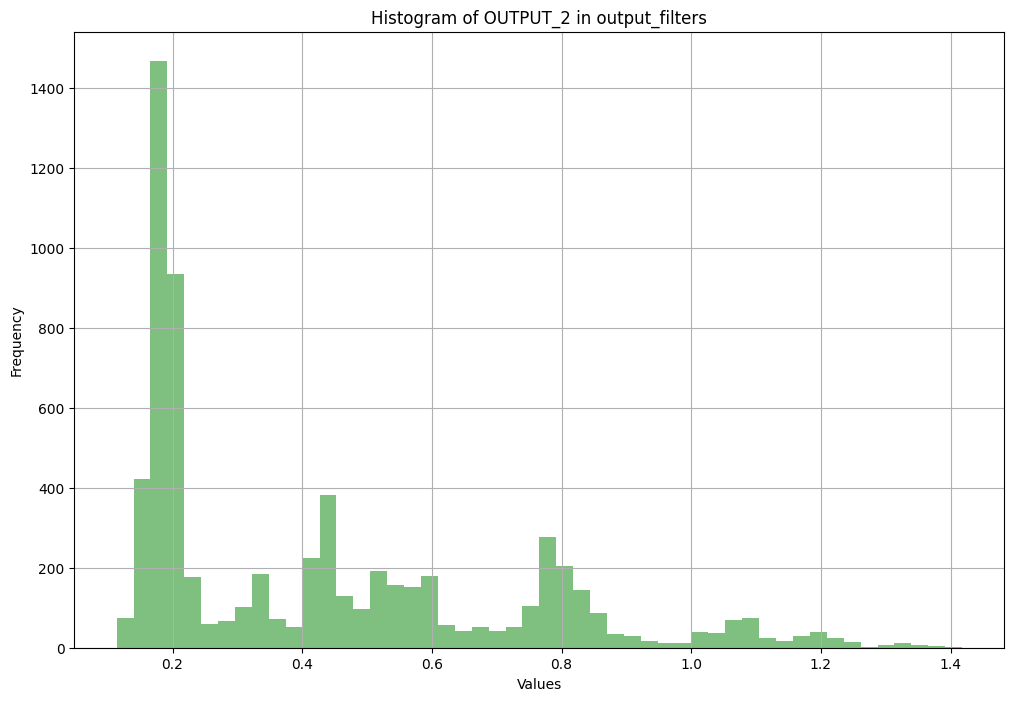

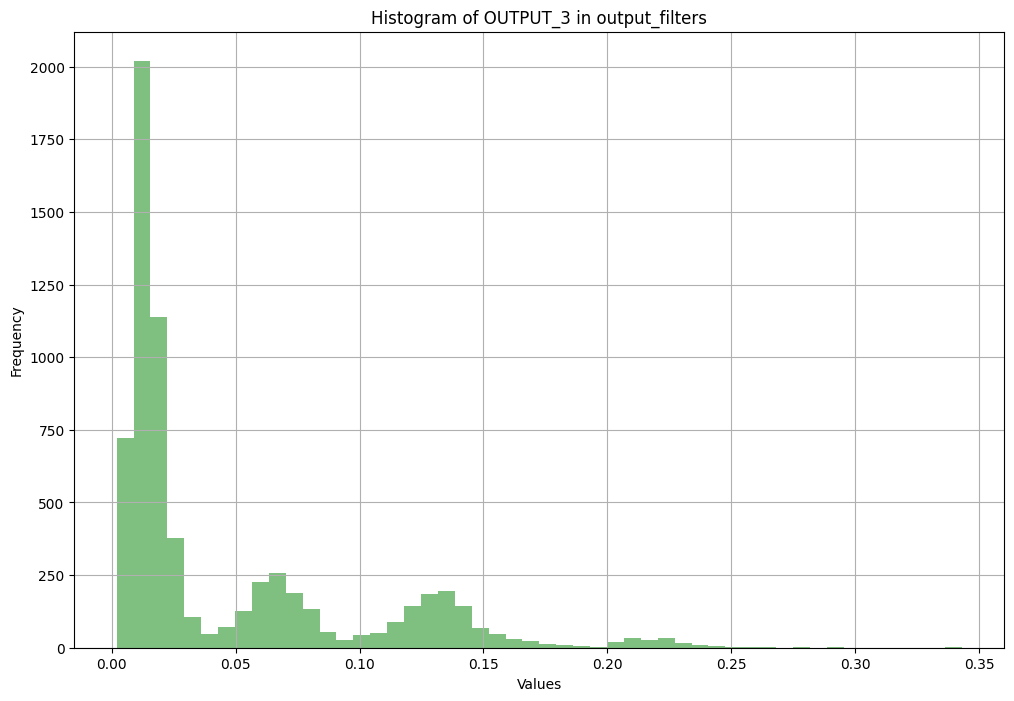

In [ ]:
plt.figure(figsize=(12, 8))
for column in input_filters.columns:
    min_value = input_filters[column].min()
    max_value = input_filters[column].max()
    
    plt.figure(figsize=(12, 8))
    plt.hist(input_filters[column], bins=50, range=(min_value, max_value), color='blue', alpha=0.5)
    plt.title(f'Histogram of {column} in input_filters')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

plt.figure(figsize=(12, 8))
for column in output_filters.columns:
    min_value = output_filters[column].min()
    max_value = output_filters[column].max()

    plt.figure(figsize=(12, 8))
    plt.hist(output_filters[column], bins=50, range=(min_value, max_value), color='green', alpha=0.5)
    plt.title(f'Histogram of {column} in output_filters')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [ ]:
input_skewness = input_filters.skew()

print("Skewness for columns in input_filters:")
print(input_skewness)

output_skewness = output_filters.skew()
print("Skewness for columns in output_filters:")
print(output_skewness)

Skewness for columns in input_filters:
INPUT_1      7.354242
INPUT_2      1.028842
INPUT_3      1.515897
INPUT_4      0.615981
INPUT_5      1.875059
INPUT_6      0.368646
INPUT_7     14.888845
INPUT_8     31.291144
INPUT_9      6.673907
INPUT_11     6.640922
INPUT_12     1.922649
INPUT_16    24.634117
dtype: float64
Skewness for columns in output_filters:
OUTPUT_1    7.312786
OUTPUT_2    1.009998
OUTPUT_3    1.571039
dtype: float64


How to deal with skew

### BIVARIATE ANALYSIS

## Correlation

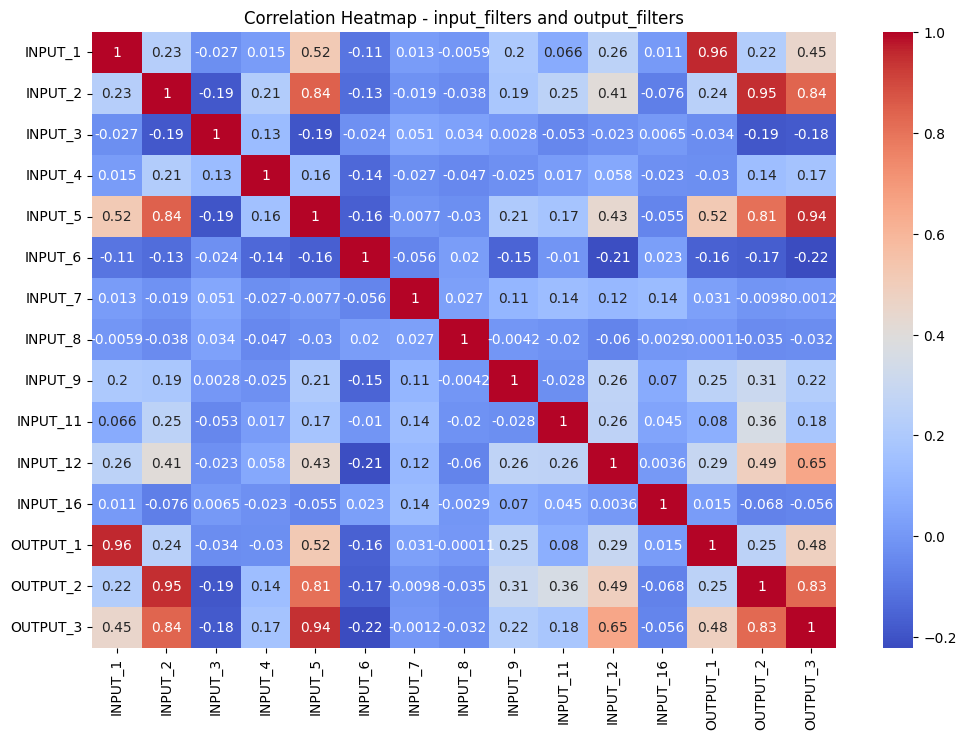

In [ ]:
combined_data = pd.concat([input_filters, output_filters], axis=1)

corr_matrix = combined_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - input_filters and output_filters')
plt.show()

In [ ]:
correlation_threshold = 0.7

for output_column in output_filters.columns:
    print(f"Strongly correlated components for '{output_column}':")
    
    correlations = input_filters.corrwith(output_filters[output_column])
    
    strongly_correlated_components = correlations[abs(correlations) > correlation_threshold]
    
    print(strongly_correlated_components)
    print()

Strongly correlated components for 'OUTPUT_1':
INPUT_1    0.96098
dtype: float64

Strongly correlated components for 'OUTPUT_2':
INPUT_2    0.951043
INPUT_5    0.806214
dtype: float64

Strongly correlated components for 'OUTPUT_3':
INPUT_2    0.835651
INPUT_5    0.944742
dtype: float64



Strongly correlated components for 'OUTPUT_1':


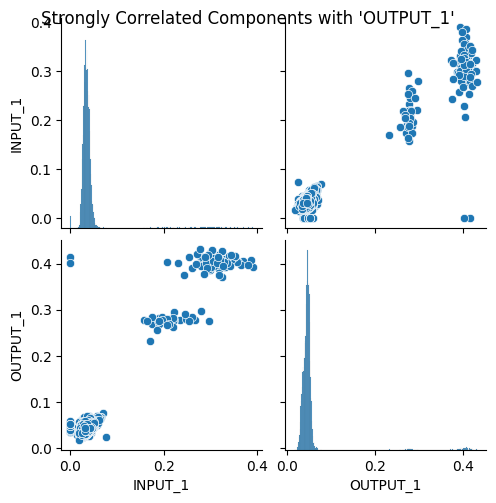


Strongly correlated components for 'OUTPUT_2':


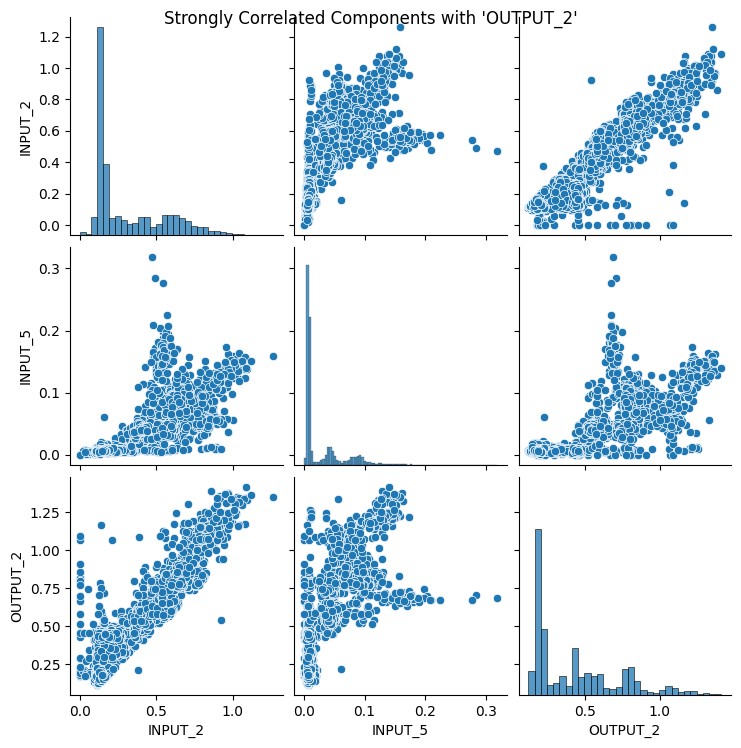


Strongly correlated components for 'OUTPUT_3':


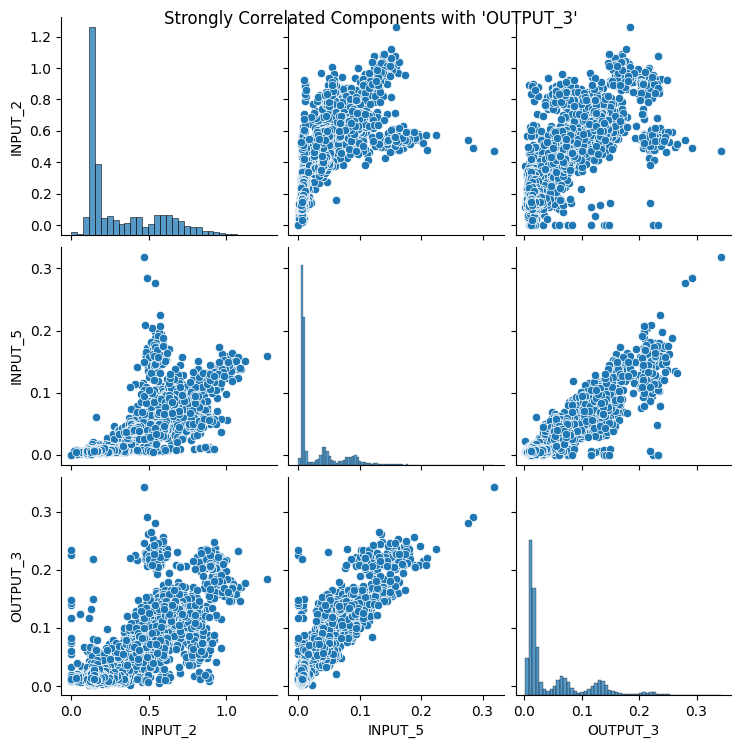

In [ ]:
correlation_threshold = 0.7

for output_column in output_filters.columns:
    print(f"Strongly correlated components for '{output_column}':")
    
    correlations = input_filters.corrwith(output_filters[output_column])
    
    strongly_correlated_components = correlations[abs(correlations) > correlation_threshold]

    correlated_columns = strongly_correlated_components.index.tolist()
    
    combined_data = pd.concat([input_filters[correlated_columns], output_filters[output_column]], axis=1)

    g = sns.pairplot(combined_data)
    g.fig.suptitle(f"Strongly Correlated Components with '{output_column}'", y=0.99)
    plt.show()
    print()

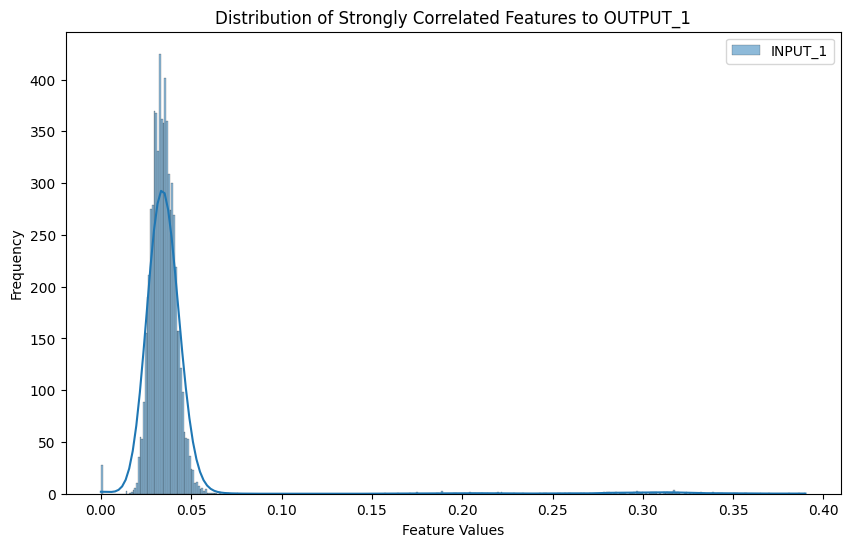

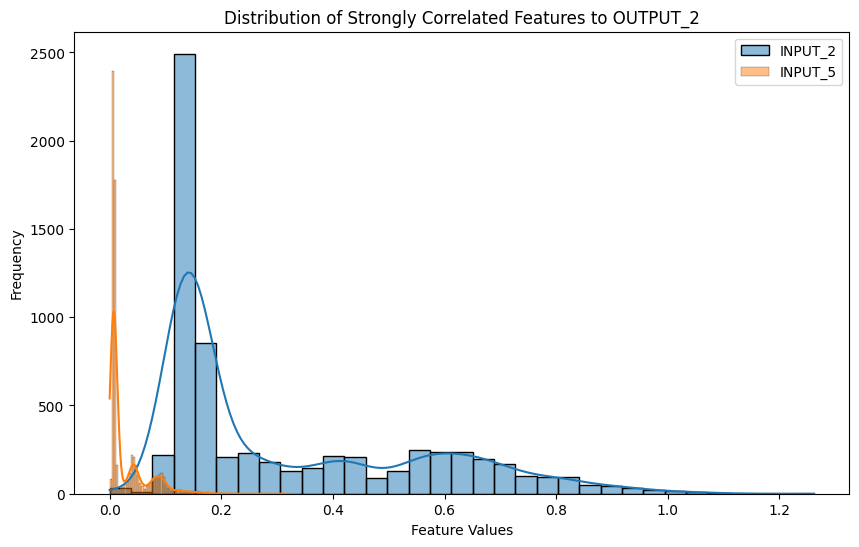

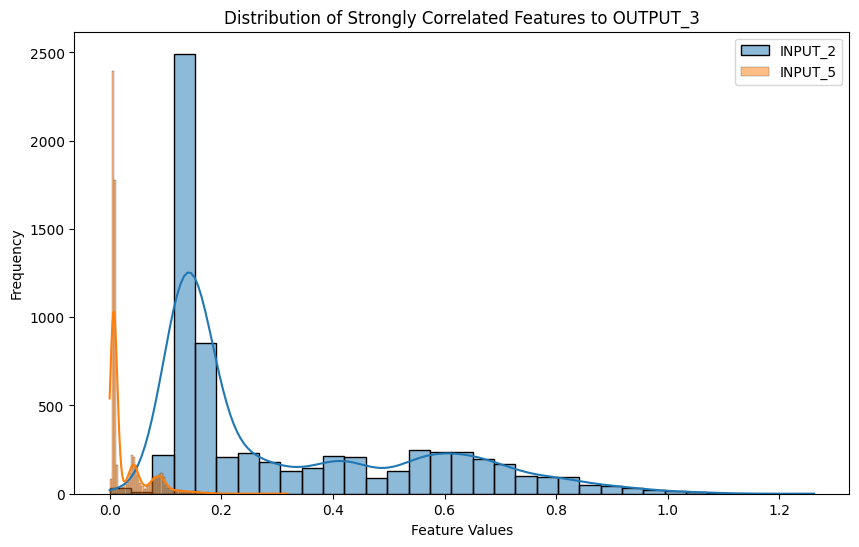

In [ ]:
strong_correlated_features_dict = {}

for output_variable in output_filters.columns:
    correlations = input_filters.corrwith(output_filters[output_variable])

   
    strongly_correlated_features = correlations[abs(correlations) > correlation_threshold]

    
    strong_correlated_features_dict[output_variable] = strongly_correlated_features

for output_variable, correlated_features in strong_correlated_features_dict.items():
    plt.figure(figsize=(10, 6))
    plt.title(f"Distribution of Strongly Correlated Features to {output_variable}")
    
    for feature in correlated_features.index:
        sns.histplot(input_filters[feature], kde=True, label=feature)
    
    plt.xlabel("Feature Values")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

## Normalization z score

In [ ]:
normalized_input_filters = input_filters.apply(zscore)
normalized_output_filters = output_filters.apply(zscore)

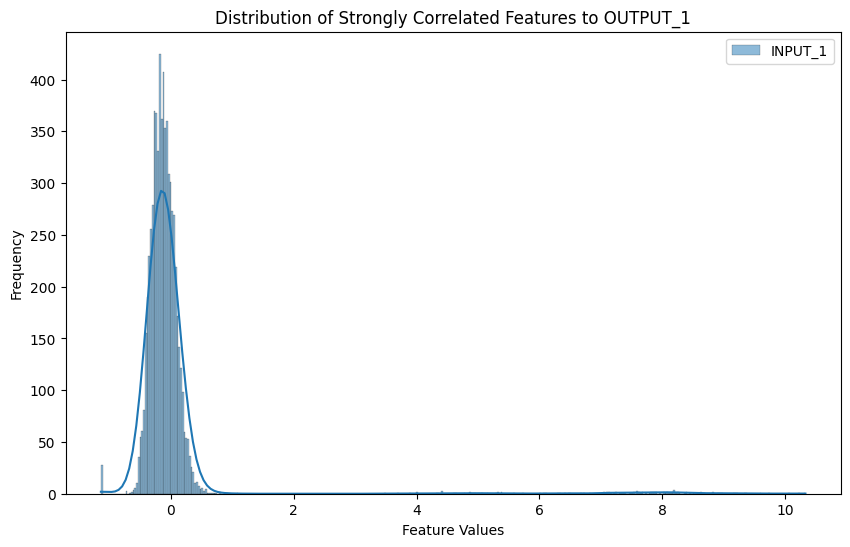

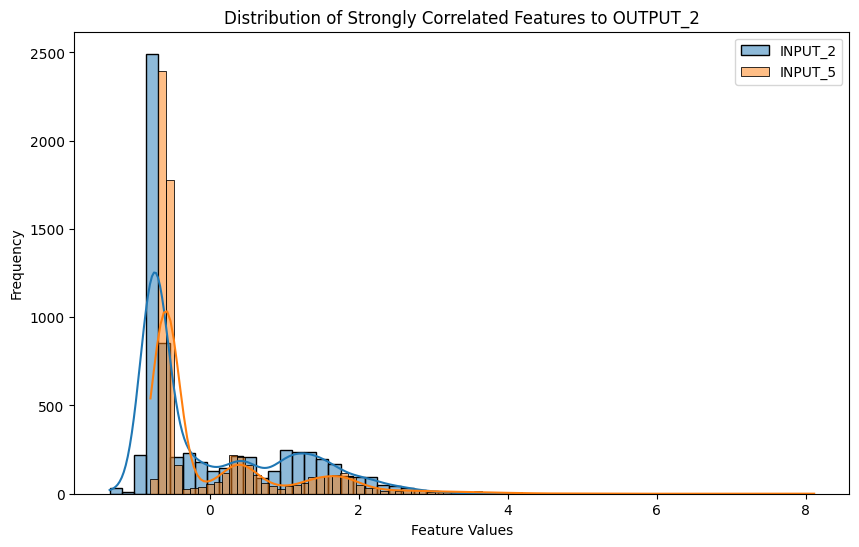

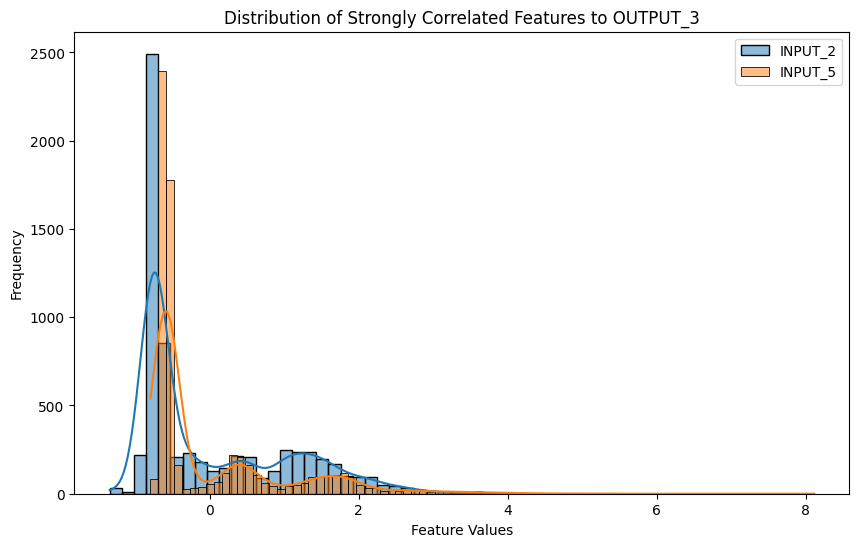

In [ ]:
for output_variable in normalized_output_filters.columns:
    correlations = normalized_input_filters.corrwith(output_filters[output_variable])

    strongly_correlated_features = correlations[abs(correlations) > correlation_threshold]

    strong_correlated_features_dict[output_variable] = strongly_correlated_features

for output_variable, correlated_features in strong_correlated_features_dict.items():
    plt.figure(figsize=(10, 6))
    plt.title(f"Distribution of Strongly Correlated Features to {output_variable}")
    
    for feature in correlated_features.index:
        sns.histplot(normalized_input_filters[feature], kde=True, label=feature)
    
    plt.xlabel("Feature Values")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

## Final thoughts
 * need to do something about skew
 * 123 values with same values in ID_1 and ID_2
 * varaibles 8-16 has over 70% NaN values

